In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import awkward as ak
from fast_histogram import histogram2d
import seaborn as sn
import h5py

In [2]:
MIN_RES = 20

filename = "ttbar_13TeV_taus_1000events"
rootfile = "/disk/atlas3/data_MC/delphes/ttbar_13TeV_taus_1000events.root:Delphes"
savepath = "/home/agrefsru/imcalML/fig/"

RESOLUTION = int(4*MIN_RES)
MAX_EVENTS = 10000

In [3]:
#Load relevant data
def load_data(rootfile:str, branch:str, keys:list):
    with uproot.open(rootfile) as file:
        valid_list = [key in file.keys() for key in keys]
        if valid_list:
            arr = file[branch].arrays(keys, library="ak", how="zip")
            return arr[branch]
        else:
            print(keys[not(valid_list)], " not present in data.")

clusters = load_data(rootfile, "Tower", ["Tower.ET", "Tower.Eta", "Tower.Phi", "Tower.Eem", "Tower.Ehad"])

In [89]:
image = clusters[20]
eta = ak.to_numpy(image.Eta)
phi = ak.to_numpy(image.Phi)
Eem = ak.to_numpy(image.Eem)
Ehad = ak.to_numpy(image.Ehad)

(-0.5, 299.5, 74.5, -0.5)

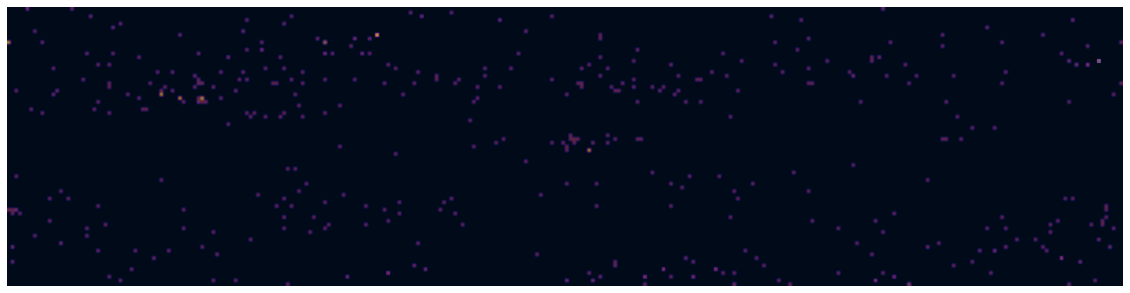

In [92]:
hist_NW = np.histogram2d(eta, phi, bins=[75, 300], density=False)
hist_Eem = np.histogram2d(eta, phi, weights=Eem, bins=[75, 300], density=False)
hist_Ehad = np.histogram2d(eta, phi, weights=Ehad, bins=[75, 300], density=False)
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 8))
axs.imshow(hist_NW[0], cmap="inferno", interpolation='kaiser', aspect="equal", alpha=1)
axs.imshow(hist_Eem[0], cmap="magma", interpolation='nearest', aspect="equal", alpha=0.3)
axs.imshow(hist_Ehad[0], cmap="cividis", interpolation='bilinear', aspect="equal", alpha=0.3)
axs.axis('off')